# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

* [Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 
* avaliable also on Kaggle: https://www.kaggle.com/rtatman/lego-database?select=themes.csv

# Import Statements

In [1]:
import pandas as pd

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors = pd.read_csv("data/colors.csv")

In [3]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
colors.rgb.nunique()

124

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [12]:
colors.loc[colors.is_trans =='t'].nunique()

id          28
name        28
rgb         25
is_trans     1
dtype: int64

In [13]:
colors.groupby('is_trans').rgb.nunique()

is_trans
f    103
t     25
Name: rgb, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets


 Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="https://i.imgur.com/whB1olq.png" >

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [14]:
sets = pd.read_csv('data/sets.csv')

In [15]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [16]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [24]:
sets.groupby(['name', 'year']).year.unique().sort_values()

name                               year
Small Doors and Windows Set (ABB)  1949    [1949]
Large Gift Set (ABB)               1949    [1949]
Medium Gift Set (ABB)              1949    [1949]
Extra-Large Gift Set (ABB)         1949    [1949]
Small Brick Set (ABB)              1949    [1949]
                                            ...  
Ninjago Sword of Destiny           2020    [2020]
Lion Dance                         2020    [2020]
Minions in Gru’s Lab               2021    [2021]
Minions Kung Fu Battle             2021    [2021]
Minion Pilot in Training           2021    [2021]
Name: year, Length: 15229, dtype: object

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [34]:
sets.name.nunique()

13437

In [35]:
sets.loc[sets.year == 1949].name.nunique()

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [36]:
sets.groupby(['name', 'num_parts']).num_parts.unique().sort_values(ascending=False).head()

name                           num_parts
The Ultimate Battle for Chima  9987         [9987]
UCS Millennium Falcon          7541         [7541]
Hogwarts Castle                6020         [6020]
Taj Mahal                      5923         [5923]
                               5922         [5922]
Name: num_parts, dtype: object

In [37]:
sets.sort_values('num_parts',ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [38]:
sets.groupby(['name','num_parts']).num_parts.max().sort_values(ascending=False).head()

name                           num_parts
The Ultimate Battle for Chima  9987         9987
UCS Millennium Falcon          7541         7541
Hogwarts Castle                6020         6020
Taj Mahal                      5923         5923
                               5922         5922
Name: num_parts, dtype: int64

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [39]:
sets.groupby('year').name.count()

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: name, Length: 71, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [51]:
set_to_2020_year = sets.loc[sets.year <= 2020]

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [52]:
set_to_2020_year.groupby('year').theme_id.nunique()

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2016    92
2017    89
2018    93
2019    78
2020    82
Name: theme_id, Length: 70, dtype: int64

In [53]:
theme_id_per_year = sets.loc[sets.year <= 2020].groupby('year').theme_id.agg(['nunique'], axis="columns")

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'theme id')

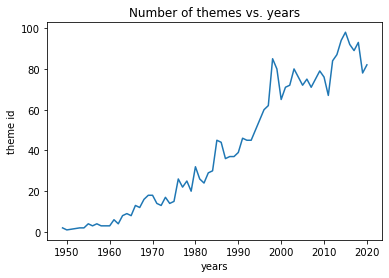

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(theme_id_per_year)
plt.title('Number of themes vs. years')
plt.xlabel('years')
plt.ylabel('theme id')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [87]:
#set_to_2020_year.groupby('year').num_parts.agg(['mean']) # alternative way

In [61]:
av_num_parts_per_year = set_to_2020_year.groupby('year').agg({'num_parts': pd.Series.mean})
av_num_parts_per_year

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2016,209.920740
2017,221.840967
2018,213.618873


**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

Text(0, 0.5, 'average number of parts')

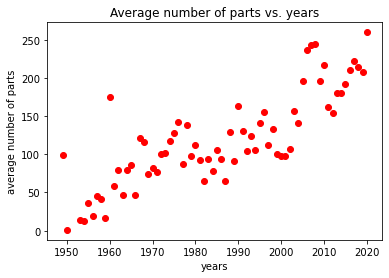

In [60]:
plt.scatter(av_num_parts_per_year.index, av_num_parts_per_year, color='red')
plt.title('Average number of parts vs. years')
plt.xlabel('years')
plt.ylabel('average number of parts')

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [71]:
sets.theme_id.value_counts().sort_values(ascending=False)

158    753
501    656
494    398
435    356
503    329
      ... 
455      1
383      1
210      1
415      1
380      1
Name: theme_id, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [72]:
themes = pd.read_csv("data/themes.csv")

In [77]:
themes.loc[themes.name== 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [76]:
themes.loc[themes.name== 'Star Wars'].id.count()

4

In [74]:
themes.loc[themes.name== 'Gears']

,id,name,parent_id
393,472,Gears,465.0


### Merging (i.e., Combining) DataFrames based on a Key


In [79]:
sets_joined = sets.join(themes.set_index(['id']), on=['theme_id'], lsuffix='_set', rsuffix='_theme')

In [80]:
sets_joined

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id
0,001-1,Gears,1965,1,43,Technic,NaN
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,Supplemental,126.0
...,...,...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0,Cowboys,475.0
15706,XMASTREE-1,Christmas Tree,2019,410,26,Pick A Model,408.0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60,Star Wars,NaN
15708,XWING-2,X-Wing Trench Run,2019,158,52,Star Wars,NaN


In [81]:
sets_joined.loc[sets_joined.theme_id== 158]

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73,Star Wars,NaN
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70,Star Wars,NaN
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64,Star Wars,NaN
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84,Star Wars,NaN
1738,20009-1,AT-TE Walker - Mini,2009,158,94,Star Wars,NaN
...,...,...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0,Star Wars,NaN
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0,Star Wars,NaN
15707,XWING-1,Mini X-Wing Fighter,2019,158,60,Star Wars,NaN
15708,XWING-2,X-Wing Trench Run,2019,158,52,Star Wars,NaN


In [83]:
sets_joined.loc[sets_joined.name_theme== 'Star Wars']

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73,Star Wars,NaN
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70,Star Wars,NaN
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64,Star Wars,NaN
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84,Star Wars,NaN
1738,20009-1,AT-TE Walker - Mini,2009,158,94,Star Wars,NaN
...,...,...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0,Star Wars,NaN
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0,Star Wars,NaN
15707,XWING-1,Mini X-Wing Fighter,2019,158,60,Star Wars,NaN
15708,XWING-2,X-Wing Trench Run,2019,158,52,Star Wars,NaN


In [84]:
set_number_per_theme = sets_joined.groupby('name_theme').name_theme.count().sort_values(ascending=False)

In [85]:
set_number_per_theme[:10]

name_theme
Star Wars       776
Gear            656
Basic Set       558
Supplemental    535
Technic         453
Friends         415
Ninjago         360
Town            360
Key Chain       329
Books           310
Name: name_theme, dtype: int64

Text(0.5, 0, 'Theme Name')

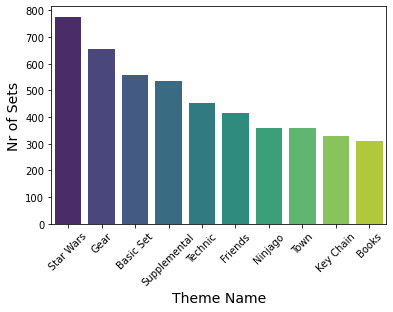

In [86]:
import seaborn as sns
sns.barplot(x=set_number_per_theme.index[:10], y=set_number_per_theme[:10], palette="viridis")
plt.xticks(rotation=45)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)